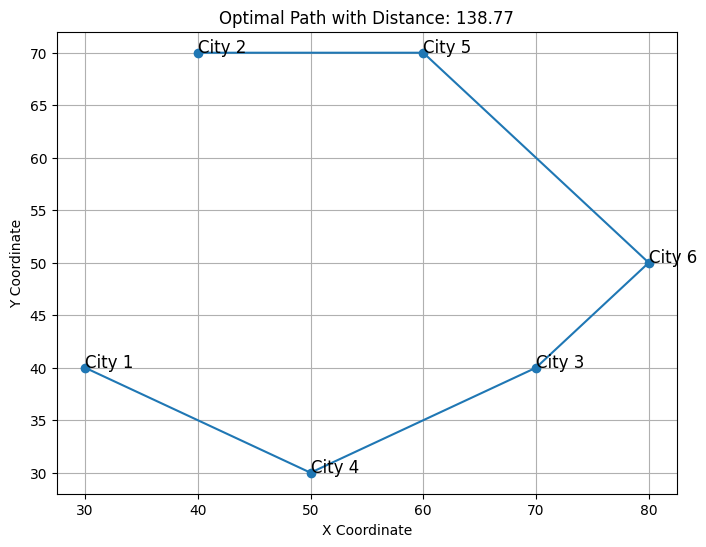

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Coordinates of the cities
coordinates = np.array([
    [30, 40],  # City 1
    [40, 70],  # City 2
    [70, 40],  # City 3
    [50, 30],  # City 4
    [60, 70],  # City 5
    [80, 50]   # City 6
])

# Calculate pairwise distances
def euclidean_distance(coord1, coord2):
    return np.sqrt(np.sum((coord1 - coord2) ** 2))

n = len(coordinates)
distance_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        if i != j:
            distance_matrix[i][j] = euclidean_distance(coordinates[i], coordinates[j])

# Held-Karp Algorithm
def held_karp(dists):
    n = len(dists)
    C = {}
    for k in range(1, n):
        C[(1 << k, k)] = (dists[0][k], 0)
    for subset_size in range(2, n):
        for subset in combinations(range(1, n), subset_size):
            bits = 0
            for bit in subset:
                bits |= 1 << bit
            for k in subset:
                prev = bits & ~(1 << k)
                res = []
                for m in subset:
                    if m == k:
                        continue
                    res.append((C[(prev, m)][0] + dists[m][k], m))
                C[(bits, k)] = min(res)
    bits = (2**n - 1) - 1
    res = []
    for k in range(1, n):
        res.append((C[(bits, k)][0] + dists[k][0], k))
    opt, parent = min(res)
    path = []
    for i in range(n - 1):
        path.append(parent)
        new_bits = bits & ~(1 << parent)
        _, parent = C[(bits, parent)]
        bits = new_bits
    path.append(0)
    path.reverse()
    return opt, path

from itertools import combinations

# Solve the TSP
opt_distance, path = held_karp(distance_matrix)
path_coordinates = coordinates[path]

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(path_coordinates[:, 0], path_coordinates[:, 1], 'o-')
for i, coord in enumerate(path_coordinates):
    plt.text(coord[0], coord[1], f'City {path[i]+1}', fontsize=12)
plt.title(f"Optimal Path with Distance: {opt_distance:.2f}")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.grid(True)
plt.show()
